In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 323 µs (started: 2024-11-03 05:53:02 +00:00)


In [2]:
import pandas as pd
df_filtered = pd.read_parquet('/kaggle/input/preprocessed-dataset/preprocessed_dataset.parquet')

time: 3.03 s (started: 2024-11-03 05:53:02 +00:00)


In [3]:
df_filtered = df_filtered.sample(frac=0.03, random_state=42) 

time: 65.6 ms (started: 2024-11-03 05:53:05 +00:00)


In [4]:
df_filtered.head()

,Rndrng_NPI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_St1,Rndrng_Prvdr_City,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
382395,1124007489,NP,M,37 W Garden St Ste 105,Auburn,36,13021,Nurse Practitioner,Y,36415,Insertion of needle into vein for collection o...,N,O,25,27.0,27,7.0,2.970000,2.970000,2.940000
307016,1356380828,MD,F,222 Bloomingdale Rd Fl 2,White Plains,36,10605,Allergy/ Immunology,Y,95004,Test for allergy using allergenic extract,N,O,104,11220.0,187,15.0,5.557271,4.401333,3.206894
273252,1497723472,MD,M,1705 E Broadway,Columbia,29,65201,Hematology-Oncology,Y,99223,"Initial hospital inpatient care per day, typic...",N,F,31,31.0,31,412.0,188.112258,150.412258,155.460000
86082,1942677141,DPT,F,1731 Henry Luckow Ln,Belvidere,17,61008,Physical Therapist in Private Practice,Y,97530,Therapy procedure using functional activities,N,O,16,425.0,288,80.0,28.466847,22.714447,27.862941
371505,1245254515,MD,M,1010 W 40th St,Austin,48,78756,Thoracic Surgery,Y,33405,Replacement of aortic valve on heart-lung machine,N,F,12,12.0,12,1625.0,230.680000,184.245000,156.627500


time: 34.6 ms (started: 2024-11-03 05:53:06 +00:00)


In [5]:
df_filtered['Rndrng_Prvdr_Type'].value_counts()

Rndrng_Prvdr_Type
Diagnostic Radiology                              1731
Internal Medicine                                 1292
Family Practice                                   1216
Nurse Practitioner                                1133
Physician Assistant                                767
                                                  ... 
Geriatric Psychiatry                                 2
Oral Surgery (Dentist only)                          2
Certified Nurse Midwife                              1
Registered Dietitian or Nutrition Professional       1
Undersea and Hyperbaric Medicine                     1
Name: count, Length: 77, dtype: int64

time: 17.5 ms (started: 2024-11-03 05:53:06 +00:00)


In [6]:
df_filtered['Rndrng_NPI'] =df_filtered['Rndrng_NPI'].astype('category')
df_filtered['Rndrng_Prvdr_Type'] =df_filtered['Rndrng_Prvdr_Type'].astype('category')

time: 13 ms (started: 2024-11-03 05:53:06 +00:00)


In [7]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13531 entries, 382395 to 10502
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Rndrng_NPI                     13531 non-null  category
 1   Rndrng_Prvdr_Crdntls           13531 non-null  object  
 2   Rndrng_Prvdr_Gndr              13531 non-null  object  
 3   Rndrng_Prvdr_St1               13531 non-null  object  
 4   Rndrng_Prvdr_City              13531 non-null  object  
 5   Rndrng_Prvdr_State_FIPS        13531 non-null  object  
 6   Rndrng_Prvdr_Zip5              13531 non-null  object  
 7   Rndrng_Prvdr_Type              13531 non-null  category
 8   Rndrng_Prvdr_Mdcr_Prtcptg_Ind  13531 non-null  object  
 9   HCPCS_Cd                       13531 non-null  object  
 10  HCPCS_Desc                     13531 non-null  object  
 11  HCPCS_Drug_Ind                 13531 non-null  object  
 12  Place_Of_Srvc                  1

In [8]:
# import pandas as pd
# import torch
# from transformers import BertTokenizer, BertModel

time: 273 µs (started: 2024-11-03 05:53:06 +00:00)


In [9]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")  # Use GPU
    print("GPU is available.")
else:
    device = torch.device("cpu")  # Fallback to CPU
    print("GPU is not available, using CPU.")


GPU is available.
time: 5.49 s (started: 2024-11-03 05:53:06 +00:00)


In [10]:
df_filtered.head()

,Rndrng_NPI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_St1,Rndrng_Prvdr_City,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
382395,1124007489,NP,M,37 W Garden St Ste 105,Auburn,36,13021,Nurse Practitioner,Y,36415,Insertion of needle into vein for collection o...,N,O,25,27.0,27,7.0,2.970000,2.970000,2.940000
307016,1356380828,MD,F,222 Bloomingdale Rd Fl 2,White Plains,36,10605,Allergy/ Immunology,Y,95004,Test for allergy using allergenic extract,N,O,104,11220.0,187,15.0,5.557271,4.401333,3.206894
273252,1497723472,MD,M,1705 E Broadway,Columbia,29,65201,Hematology-Oncology,Y,99223,"Initial hospital inpatient care per day, typic...",N,F,31,31.0,31,412.0,188.112258,150.412258,155.460000
86082,1942677141,DPT,F,1731 Henry Luckow Ln,Belvidere,17,61008,Physical Therapist in Private Practice,Y,97530,Therapy procedure using functional activities,N,O,16,425.0,288,80.0,28.466847,22.714447,27.862941
371505,1245254515,MD,M,1010 W 40th St,Austin,48,78756,Thoracic Surgery,Y,33405,Replacement of aortic valve on heart-lung machine,N,F,12,12.0,12,1625.0,230.680000,184.245000,156.627500


time: 21.2 ms (started: 2024-11-03 05:53:11 +00:00)


In [11]:
df_filtered
# Rndrng_Prvdr_Mdcr_Prtcptg_Ind Y = 1, N = 0
# HCPCS_Drug_Ind Y = 1, N = 0
# Place_Of_Srvc F = 1, O = 0
# Rndrng_Prvdr_Gndr M = 1, F = 0

,Rndrng_NPI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_St1,Rndrng_Prvdr_City,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
382395,1124007489,NP,M,37 W Garden St Ste 105,Auburn,36,13021,Nurse Practitioner,Y,36415,Insertion of needle into vein for collection o...,N,O,25,27.0,27,7.000000,2.970000,2.970000,2.940000
307016,1356380828,MD,F,222 Bloomingdale Rd Fl 2,White Plains,36,10605,Allergy/ Immunology,Y,95004,Test for allergy using allergenic extract,N,O,104,11220.0,187,15.000000,5.557271,4.401333,3.206894
273252,1497723472,MD,M,1705 E Broadway,Columbia,29,65201,Hematology-Oncology,Y,99223,"Initial hospital inpatient care per day, typic...",N,F,31,31.0,31,412.000000,188.112258,150.412258,155.460000
86082,1942677141,DPT,F,1731 Henry Luckow Ln,Belvidere,17,61008,Physical Therapist in Private Practice,Y,97530,Therapy procedure using functional activities,N,O,16,425.0,288,80.000000,28.466847,22.714447,27.862941
371505,1245254515,MD,M,1010 W 40th St,Austin,48,78756,Thoracic Surgery,Y,33405,Replacement of aortic valve on heart-lung machine,N,F,12,12.0,12,1625.000000,230.680000,184.245000,156.627500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218725,1063646651,MD,F,907 San Ramon Valley Blvd,Danville,6,94526,Family Practice,Y,99213,Established patient office or other outpatient...,N,O,159,230.0,230,202.000000,82.909609,52.347522,63.220087
104321,1861479370,MD,M,6405 France Avenue S,Edina,27,55435,Cardiology,Y,93306,Ultrasound of heart with color-depicted blood ...,N,F,61,61.0,61,245.819672,68.292131,46.862787,46.661639
26330,1538127519,MD,F,9 Chatham Ctr S,Savannah,13,31405,Family Practice,Y,83721,Ldl cholesterol level,N,O,67,71.0,71,39.000000,10.036338,10.036338,10.290000
233936,1497751085,MD,M,16 Medical Park Dr,Asheville,37,28803,Micrographic Dermatologic Surgery,Y,17003,"Destruction of precancer skin growth, 2-14 gro...",N,O,11,25.0,12,23.000000,6.555600,4.835200,5.024400


time: 28.8 ms (started: 2024-11-03 05:53:11 +00:00)


# Col that should be dropped

In [12]:
df_filtered.head()

,Rndrng_NPI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_St1,Rndrng_Prvdr_City,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
382395,1124007489,NP,M,37 W Garden St Ste 105,Auburn,36,13021,Nurse Practitioner,Y,36415,Insertion of needle into vein for collection o...,N,O,25,27.0,27,7.0,2.970000,2.970000,2.940000
307016,1356380828,MD,F,222 Bloomingdale Rd Fl 2,White Plains,36,10605,Allergy/ Immunology,Y,95004,Test for allergy using allergenic extract,N,O,104,11220.0,187,15.0,5.557271,4.401333,3.206894
273252,1497723472,MD,M,1705 E Broadway,Columbia,29,65201,Hematology-Oncology,Y,99223,"Initial hospital inpatient care per day, typic...",N,F,31,31.0,31,412.0,188.112258,150.412258,155.460000
86082,1942677141,DPT,F,1731 Henry Luckow Ln,Belvidere,17,61008,Physical Therapist in Private Practice,Y,97530,Therapy procedure using functional activities,N,O,16,425.0,288,80.0,28.466847,22.714447,27.862941
371505,1245254515,MD,M,1010 W 40th St,Austin,48,78756,Thoracic Surgery,Y,33405,Replacement of aortic valve on heart-lung machine,N,F,12,12.0,12,1625.0,230.680000,184.245000,156.627500


time: 18.2 ms (started: 2024-11-03 05:53:11 +00:00)


In [13]:
list(df_filtered.columns)

['Rndrng_NPI',
 'Rndrng_Prvdr_Crdntls',
 'Rndrng_Prvdr_Gndr',
 'Rndrng_Prvdr_St1',
 'Rndrng_Prvdr_City',
 'Rndrng_Prvdr_State_FIPS',
 'Rndrng_Prvdr_Zip5',
 'Rndrng_Prvdr_Type',
 'Rndrng_Prvdr_Mdcr_Prtcptg_Ind',
 'HCPCS_Cd',
 'HCPCS_Desc',
 'HCPCS_Drug_Ind',
 'Place_Of_Srvc',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt',
 'Avg_Mdcr_Stdzd_Amt']

time: 6.44 ms (started: 2024-11-03 05:53:11 +00:00)


In [14]:
df_filtered['HCPCS_Cd'].value_counts()

HCPCS_Cd
99214    769
99213    754
99204    355
99203    233
99232    228
        ... 
84154      1
43450      1
26990      1
93279      1
27134      1
Name: count, Length: 1361, dtype: int64

time: 11.8 ms (started: 2024-11-03 05:53:11 +00:00)


In [15]:
df_filtered['Rndrng_Prvdr_Type'].value_counts()

Rndrng_Prvdr_Type
Diagnostic Radiology                              1731
Internal Medicine                                 1292
Family Practice                                   1216
Nurse Practitioner                                1133
Physician Assistant                                767
                                                  ... 
Oral Surgery (Dentist only)                          2
Geriatric Psychiatry                                 2
Certified Nurse Midwife                              1
Registered Dietitian or Nutrition Professional       1
Undersea and Hyperbaric Medicine                     1
Name: count, Length: 77, dtype: int64

time: 10.2 ms (started: 2024-11-03 05:53:11 +00:00)


In [16]:
dropped_cols= ['Rndrng_Prvdr_Zip5','Rndrng_Prvdr_Crdntls'] # kode negara bagian dan kredentials
    
df_filtered.drop(dropped_cols,axis=1,inplace=True)

## Ini dulu, yang lain ada lagi nanti yang didrop
# coba kode pos dilabel encoding

time: 9.48 ms (started: 2024-11-03 05:53:11 +00:00)


# Encoding

In [17]:
# Mapping dictionaries for label encoding

if 'Y' in df_filtered['Rndrng_Prvdr_Mdcr_Prtcptg_Ind'].value_counts():
    mapping_dicts = {
        "Rndrng_Prvdr_Mdcr_Prtcptg_Ind": {'Y': 1, 'N': 0},
        "HCPCS_Drug_Ind": {'Y': 1, 'N': 0},
        "Place_Of_Srvc": {'F': 1, 'O': 0},
        "Rndrng_Prvdr_Gndr": {'M': 1, 'F': 0}
    }

    # Applying the mappings to df_filtered
    for col, mapping in mapping_dicts.items():
        if col in df_filtered.columns:
            df_filtered[col] = df_filtered[col].map(mapping)
            df_filtered[col] = df_filtered[col].astype(int)
df_filtered.head()

,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_St1,Rndrng_Prvdr_City,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
382395,1124007489,1,37 W Garden St Ste 105,Auburn,36,Nurse Practitioner,1,36415,Insertion of needle into vein for collection o...,0,0,25,27.0,27,7.0,2.970000,2.970000,2.940000
307016,1356380828,0,222 Bloomingdale Rd Fl 2,White Plains,36,Allergy/ Immunology,1,95004,Test for allergy using allergenic extract,0,0,104,11220.0,187,15.0,5.557271,4.401333,3.206894
273252,1497723472,1,1705 E Broadway,Columbia,29,Hematology-Oncology,1,99223,"Initial hospital inpatient care per day, typic...",0,1,31,31.0,31,412.0,188.112258,150.412258,155.460000
86082,1942677141,0,1731 Henry Luckow Ln,Belvidere,17,Physical Therapist in Private Practice,1,97530,Therapy procedure using functional activities,0,0,16,425.0,288,80.0,28.466847,22.714447,27.862941
371505,1245254515,1,1010 W 40th St,Austin,48,Thoracic Surgery,1,33405,Replacement of aortic valve on heart-lung machine,0,1,12,12.0,12,1625.0,230.680000,184.245000,156.627500


time: 28.5 ms (started: 2024-11-03 05:53:11 +00:00)


In [18]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13531 entries, 382395 to 10502
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Rndrng_NPI                     13531 non-null  category
 1   Rndrng_Prvdr_Gndr              13531 non-null  int64   
 2   Rndrng_Prvdr_St1               13531 non-null  object  
 3   Rndrng_Prvdr_City              13531 non-null  object  
 4   Rndrng_Prvdr_State_FIPS        13531 non-null  object  
 5   Rndrng_Prvdr_Type              13531 non-null  category
 6   Rndrng_Prvdr_Mdcr_Prtcptg_Ind  13531 non-null  int64   
 7   HCPCS_Cd                       13531 non-null  object  
 8   HCPCS_Desc                     13531 non-null  object  
 9   HCPCS_Drug_Ind                 13531 non-null  int64   
 10  Place_Of_Srvc                  13531 non-null  int64   
 11  Tot_Benes                      13531 non-null  int64   
 12  Tot_Srvcs                      1

# List label encoding

In [19]:
df_filtered.head()

,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_St1,Rndrng_Prvdr_City,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
382395,1124007489,1,37 W Garden St Ste 105,Auburn,36,Nurse Practitioner,1,36415,Insertion of needle into vein for collection o...,0,0,25,27.0,27,7.0,2.970000,2.970000,2.940000
307016,1356380828,0,222 Bloomingdale Rd Fl 2,White Plains,36,Allergy/ Immunology,1,95004,Test for allergy using allergenic extract,0,0,104,11220.0,187,15.0,5.557271,4.401333,3.206894
273252,1497723472,1,1705 E Broadway,Columbia,29,Hematology-Oncology,1,99223,"Initial hospital inpatient care per day, typic...",0,1,31,31.0,31,412.0,188.112258,150.412258,155.460000
86082,1942677141,0,1731 Henry Luckow Ln,Belvidere,17,Physical Therapist in Private Practice,1,97530,Therapy procedure using functional activities,0,0,16,425.0,288,80.0,28.466847,22.714447,27.862941
371505,1245254515,1,1010 W 40th St,Austin,48,Thoracic Surgery,1,33405,Replacement of aortic valve on heart-lung machine,0,1,12,12.0,12,1625.0,230.680000,184.245000,156.627500


time: 19.4 ms (started: 2024-11-03 05:53:11 +00:00)


## Rndrng_Prvdr_State_FIPS

In [20]:
# import pickle
# from sklearn.preprocessing import LabelEncoder

# # Initialize and fit the Label Encoder
# label_encoder = LabelEncoder()
# df_filtered['Rndrng_Prvdr_State_FIPS_encoded'] = label_encoder.fit_transform(df_filtered['Rndrng_Prvdr_State_FIPS'])
# df_filtered['Rndrng_Prvdr_State_FIPS_encoded'] = df_filtered['Rndrng_Prvdr_State_FIPS_encoded'].astype('category')

# # Save the Label Encoder to a file
# with open('Rndrng_Prvdr_State_FIPS_encoded.pkl', 'wb') as file:
#     pickle.dump(label_encoder, file)

# print("Label Encoder saved successfully.")


time: 3.42 ms (started: 2024-11-03 05:53:11 +00:00)


## Rndrng_Prvdr_Type

In [21]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Initialize and fit the Label Encoder for 'Rndrng_Prvdr_Type'
label_encoder_type = LabelEncoder()
df_filtered['Rndrng_Prvdr_Type_encoded'] = label_encoder_type.fit_transform(df_filtered['Rndrng_Prvdr_Type'])
df_filtered['Rndrng_Prvdr_Type_encoded'] = df_filtered['Rndrng_Prvdr_Type_encoded'].astype('category')

# Save the Label Encoder to a file
with open('label_encoder_Rndrng_Prvdr_Type.pkl', 'wb') as file:
    pickle.dump(label_encoder_type, file)

print("Label Encoder for 'Rndrng_Prvdr_Type' saved successfully.")


Label Encoder for 'Rndrng_Prvdr_Type' saved successfully.
time: 1.92 s (started: 2024-11-03 05:53:11 +00:00)


## HCPCS_Cd

In [22]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pickle

# Assuming df_filtered is already defined and contains the 'HCPCS_Cd' column

# Initialize and fit the Label Encoder for 'HCPCS_Cd'
label_encoder_hcpcs = LabelEncoder()
df_filtered['HCPCS_Cd_encoded'] = label_encoder_hcpcs.fit_transform(df_filtered['HCPCS_Cd'])
df_filtered['HCPCS_Cd_encoded'] = df_filtered['HCPCS_Cd_encoded'].astype('category')

# Save the Label Encoder to a file
with open('label_encoder_HCPCS_Cd.pkl', 'wb') as file:
    pickle.dump(label_encoder_hcpcs, file)

print("Label Encoder for 'HCPCS_Cd' saved successfully.")


Label Encoder for 'HCPCS_Cd' saved successfully.
time: 10.8 ms (started: 2024-11-03 05:53:13 +00:00)


# Column yang dipakai

In [23]:
listcol = ['Rndrng_NPI',
 'Rndrng_Prvdr_Gndr',
 'Rndrng_Prvdr_Mdcr_Prtcptg_Ind',
 'HCPCS_Drug_Ind',
 'Place_Of_Srvc',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt',
 'Avg_Mdcr_Stdzd_Amt',
          'Rndrng_Prvdr_Type_encoded',
          'HCPCS_Cd_encoded']

combined_df = df_filtered[listcol]

time: 4.84 ms (started: 2024-11-03 05:53:13 +00:00)


In [24]:
combined_df['Rndrng_NPI'] = combined_df['Rndrng_NPI'].astype('category')

time: 8.54 ms (started: 2024-11-03 05:53:13 +00:00)


/tmp/ipykernel_30/328094877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Rndrng_NPI'] = combined_df['Rndrng_NPI'].astype('category')


In [25]:
combined_df.head()

,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Rndrng_Prvdr_Type_encoded,HCPCS_Cd_encoded
382395,1124007489,1,1,0,0,25,27.0,27,7.0,2.970000,2.970000,2.940000,44,266
307016,1356380828,0,1,0,0,104,11220.0,187,15.0,5.557271,4.401333,3.206894,1,1005
273252,1497723472,1,1,0,1,31,31.0,31,412.0,188.112258,150.412258,155.460000,27,1126
86082,1942677141,0,1,0,0,16,425.0,288,80.0,28.466847,22.714447,27.862941,57,1094
371505,1245254515,1,1,0,1,12,12.0,12,1625.0,230.680000,184.245000,156.627500,72,256


time: 19.5 ms (started: 2024-11-03 05:53:13 +00:00)


In [26]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13531 entries, 382395 to 10502
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Rndrng_NPI                     13531 non-null  category
 1   Rndrng_Prvdr_Gndr              13531 non-null  int64   
 2   Rndrng_Prvdr_Mdcr_Prtcptg_Ind  13531 non-null  int64   
 3   HCPCS_Drug_Ind                 13531 non-null  int64   
 4   Place_Of_Srvc                  13531 non-null  int64   
 5   Tot_Benes                      13531 non-null  int64   
 6   Tot_Srvcs                      13531 non-null  float64 
 7   Tot_Bene_Day_Srvcs             13531 non-null  int64   
 8   Avg_Sbmtd_Chrg                 13531 non-null  float64 
 9   Avg_Mdcr_Alowd_Amt             13531 non-null  float64 
 10  Avg_Mdcr_Pymt_Amt              13531 non-null  float64 
 11  Avg_Mdcr_Stdzd_Amt             13531 non-null  float64 
 12  Rndrng_Prvdr_Type_encoded      1

In [27]:
combined_df['Rndrng_Prvdr_Type_encoded'].value_counts()

Rndrng_Prvdr_Type_encoded
15    1731
32    1292
18    1216
44    1133
58     767
      ... 
49       2
23       2
8        1
66       1
74       1
Name: count, Length: 77, dtype: int64

time: 6.23 ms (started: 2024-11-03 05:53:13 +00:00)


In [28]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13531 entries, 382395 to 10502
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Rndrng_NPI                     13531 non-null  category
 1   Rndrng_Prvdr_Gndr              13531 non-null  int64   
 2   Rndrng_Prvdr_Mdcr_Prtcptg_Ind  13531 non-null  int64   
 3   HCPCS_Drug_Ind                 13531 non-null  int64   
 4   Place_Of_Srvc                  13531 non-null  int64   
 5   Tot_Benes                      13531 non-null  int64   
 6   Tot_Srvcs                      13531 non-null  float64 
 7   Tot_Bene_Day_Srvcs             13531 non-null  int64   
 8   Avg_Sbmtd_Chrg                 13531 non-null  float64 
 9   Avg_Mdcr_Alowd_Amt             13531 non-null  float64 
 10  Avg_Mdcr_Pymt_Amt              13531 non-null  float64 
 11  Avg_Mdcr_Stdzd_Amt             13531 non-null  float64 
 12  Rndrng_Prvdr_Type_encoded      1

# Graph Analysis

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming combined_df is your DataFrame
# Define the categorical columns based on your input
categorical_columns = [
    'Rndrng_NPI',
    'Rndrng_Prvdr_Gndr',
    'Rndrng_Prvdr_Mdcr_Prtcptg_Ind',
    'HCPCS_Drug_Ind',
    'Place_Of_Srvc',
    'Rndrng_Prvdr_Type_encoded',
    'HCPCS_Cd_encoded'
]

# Identify numerical columns by excluding categorical columns
numerical_columns = combined_df.select_dtypes(exclude='category').columns.difference(categorical_columns)

# Separate the categorical and numerical data
categorical_data = combined_df[categorical_columns]
numerical_data = combined_df[numerical_columns]

# Standard scale the numerical columns only
scaler = MinMaxScaler()
numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_columns)

# Recombine the scaled numerical data with the original categorical data
combined_df_scaled = pd.concat([numerical_data_scaled, categorical_data.reset_index(drop=True)], axis=1)

# Display the resulting DataFrame
print(combined_df_scaled.head())


   Avg_Mdcr_Alowd_Amt  Avg_Mdcr_Pymt_Amt  Avg_Mdcr_Stdzd_Amt  Avg_Sbmtd_Chrg  \
0            0.000262           0.000327            0.000305        0.000086   
1            0.000490           0.000485            0.000333        0.000184   
2            0.016622           0.016599            0.016200        0.005060   
3            0.002515           0.002506            0.002903        0.000982   
4            0.020384           0.020333            0.016322        0.019958   

   Tot_Bene_Day_Srvcs  Tot_Benes  Tot_Srvcs  Rndrng_NPI  Rndrng_Prvdr_Gndr  \
0            0.003593   0.004175   0.000174  1124007489                  1   
1            0.039524   0.027736   0.121587  1356380828                  0   
2            0.004491   0.005965   0.000217  1497723472                  1   
3            0.062205   0.001491   0.004491  1942677141                  0   
4            0.000225   0.000298   0.000011  1245254515                  1   

   Rndrng_Prvdr_Mdcr_Prtcptg_Ind  HCPCS_Drug_Ind  

In [30]:
import networkx as nx
import pandas as pd

# Assuming combined_df_scaled is already defined and contains the necessary columns

# Function to create bipartite graphs and calculate centrality measures with weighting
def calculate_weighted_graph_features(df, node_1, node_2, weight_col, prefix):
    # Create a bipartite graph
    G = nx.Graph()
    
    # Add edges to the graph with weights
    for _, row in df.iterrows():
        G.add_edge(row[node_1], row[node_2], weight=row[weight_col])
    
    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G, distance='weight')
    pagerank = nx.pagerank(G, weight='weight')
    
    # Create a DataFrame for the centrality measures
    centrality_df = pd.DataFrame({
        'Node': list(degree_centrality.keys()),
        f'{prefix}_Degree_Centrality': list(degree_centrality.values()),
        f'{prefix}_Closeness_Centrality': list(closeness_centrality.values()),
        f'{prefix}_PageRank': list(pagerank.values())
    })
    
    return centrality_df

# Calculate graph features for each relationship with Avg_Mdcr_Pymt_Amt as weight
hcpcs_graph_features = calculate_weighted_graph_features(combined_df_scaled, 'Rndrng_NPI', 'HCPCS_Cd_encoded', 'Avg_Sbmtd_Chrg', 'HCPCS')
place_service_graph_features = calculate_weighted_graph_features(combined_df_scaled, 'Rndrng_NPI', 'Rndrng_Prvdr_Type_encoded', 'Avg_Sbmtd_Chrg', 'Provider Type')

# Merge all centrality features into a single DataFrame
combined_centrality_features = hcpcs_graph_features.merge(place_service_graph_features, on='Node', how='outer')

# Display the resulting DataFrame with graph features
print(combined_centrality_features.head())

# Optionally, you can merge these features back into your original DataFrame
combined_df_scaled = combined_df_scaled.merge(combined_centrality_features, left_on='Rndrng_NPI', right_on='Node', how='left')


   Node  HCPCS_Degree_Centrality  HCPCS_Closeness_Centrality  HCPCS_PageRank  \
0   0.0                 0.000068                    0.055473        0.000068   
1   1.0                 0.000204                    0.003266        0.000131   
2   2.0                 0.000204                    0.031035        0.000131   
3   3.0                 0.000068                    0.138702        0.000068   
4   4.0                 0.000068                    0.138702        0.000068   

   Provider Type_Degree_Centrality  Provider Type_Closeness_Centrality  \
0                         0.000597                            0.160834   
1                         0.003359                            2.430367   
2                         0.023292                            1.720287   
3                         0.000747                            0.072948   
4                         0.002016                            1.750178   

   Provider Type_PageRank  
0                0.000316  
1                0

Sure! Let's break down and interpret the three concepts: **Degree Centrality**, **Closeness Centrality**, and **PageRank**. These are common metrics used in network analysis to evaluate the importance or influence of nodes within a graph.

### 1. Degree Centrality

**Definition**: Degree centrality is the simplest centrality measure, representing the number of direct connections (edges) a node has in a graph. It indicates how many other nodes a specific node is directly connected to.

**Interpretation**:
- A node with a **high degree centrality** is often seen as a "hub" in the network. This means it has many connections, which can imply higher influence or importance in the context of the network.
- Conversely, a node with a **low degree centrality** has fewer connections, which may imply it is less influential or isolated.
- In the context of your data, if a specific provider (like `Rndrng_NPI`) has a high degree centrality with respect to a certain variable (like `HCPCS_Cd_encoded`), it means that this provider is connected to many different service codes, suggesting they may have a broader range of services or higher engagement with multiple aspects 
### 2. Closeness Centrality

**Definition**: Closeness centrality measures how close a node is to all other nodes in the network, typically calculated as the reciprocal of the sum of the shortest distances from the node to all other nodes.

$$
C_c(v) = \frac{1}{\sum_{u \in V} d(v, u)}
$$

where \(d(v, u)\) is the shortest distance from node \(v\) to node \(u\).
(v\) to node \(u\).

**Interpretation**:
- A node with **high closeness centrality** can reach other nodes in the network more quickly. This implies it can disseminate information or influence other nodes efficiently.
- A node with **low closeness centrality** is farther away from other nodes on average, indicating it may take longer to influence or communicate with others in the network.
- In practical terms, if a provider has high closeness centrality, they can effectively reach out to and connect with many patients or other providers, potentially enhancing their influence in care delivery or network interactions.

### 3. PageRank

**Definition**: PageRank is an algorithm originally used by Google to rank web pages in their search engine results. It measures the importance of a node based on the number and quality of links to it, considering that not all connections (links) are equal. A node is deemed important if it is linked to by other important nodes.

**Interpretation**:
- A node with **high PageRank** is not just connected to many other nodes but is also connected to other nodes that are themselves well-connected. This means the node is influential because it is recognized by other influential nodes.
- Conversely, a node with **low PageRank** may have many links but from less influential nodes, indicating it may not hold as much importance in the broader network.
- In your context, a provider with a high PageRank with respect to certain services indicates they are recognized as a key player not only based on their connections but also due to the quality and influence of those connections, which could relate to better outcomes or more trusted services.

### Summary

- **Degree Centrality** shows how many direct connections a node has, indicating basic influence.
- **Closeness Centrality** assesses how quickly a node can reach others in the network, reflecting efficiency in communication or influence.
- **PageRank** accounts for the importance of a node based on the quality of its connections, suggesting a more nuanced view of influence in the network.

These centrality measures can provide valuable insights into the dynamics of your network and can help identify key providers, service types, or geographical areas that may require attention in healthcare delivery or policy-making..

To assess how likely the values of **Degree Centrality**, **Closeness Centrality**, and **PageRank** are to be close to anomalies, and to understand their relationship with **Avg_Sbmtd_Chrg** (Average of the charges submitted by the provider) when used as a weight for nodes, let’s break this down into a few key points:

### Likelihood of Values Being Close to Anomalies

1. **Understanding Anomalies**:
   - Anomalies in the context of your data typically represent outliers or unusual observations that deviate significantly from the expected pattern. In insurance claims, this could mean unusually high charges, excessive frequency of claims, or patterns that don’t match typical behavior.
   - In your case, you label outliers as anomalies with a value of 1.

2. **Centrality Measures and Anomalies**:
   - **Degree Centrality**:
     - A provider with a very high degree centrality might have many connections that suggest a broad engagement with multiple services. If their Avg_Sbmtd_Chrg is also exceptionally high, it could raise flags as potentially anomalous, indicating that they are submitting unusually high charges across many service codes.
     - Conversely, if a provider has a low degree centrality and still has high Avg_Sbmtd_Chrg, it may also indicate an anomaly, as their charges might not be justified by the limited number of services they are associated with.
  
   - **Closeness Centrality**:
     - Providers with high closeness centrality are able to reach others quickly. If these providers show high Avg_Sbmtd_Chrg but have limited connections (low degree centrality), it may suggest that they are focusing on high-cost services without the usual network of referrals or collaborations, potentially indicating fraudulent behavior.
     - If a provider with high closeness centrality consistently submits high charges, it could imply they have a strong influence and potentially exploit this by overcharging.

   - **PageRank**:
     - PageRank indicates a provider’s significance based on the quality of connections. A high PageRank with high Avg_Sbmtd_Chrg could indicate that they are influential but may also be a red flag if their influence is used to justify unusually high charges. If such a provider is connected to other high PageRank nodes, it could create a network of potentially collusive behavior.
     - Conversely, if a provider has a high PageRank but low Avg_Sbmtd_Chrg, it suggests that they are respected and well-connected but may not be exploiting their position for excessive billing.

### Relation to Avg_Sbmtd_Chrg as Weight

1. **Weighting by Avg_Sbmtd_Chrg**:
   - When you use Avg_Sbmtd_Chrg as a weight in calculating centrality measures, you are effectively giving more importance to nodes that represent higher financial transactions. This approach is beneficial for detecting anomalies because:
     - It emphasizes the connections and relationships that involve higher financial stakes, making it easier to identify unusual patterns in high-cost claims.
     - It allows the centrality measures to reflect not only the structural position of a node in the network but also the economic significance of its interactions.

2. **Implications for Anomaly Detection**:
   - By integrating Avg_Sbmtd_Chrg into the centrality calculations:
     - You can identify providers that, despite having a large network, might be charging disproportionately high amounts, thus likely indicating anomalies.
     - It helps to reveal cases where providers are clustered together with high charges, potentially indicating fraudulent schemes or collusion within a network.
     - It also aids in pinpointing outliers in the billing behavior of providers, which could lead to further investigation into their practices.

### Conclusion

In summary, the relationships among Degree Centrality, Closeness Centrality, PageRank, and Avg_Sbmtd_Chrg as a weight create a nuanced picture of how providers operate within the healthcare system. By examining these metrics together, you can gain insights into potential anomalies in billing practices, identifying those providers who might be engaging in fraudulent or inappropriate behaviors. This integrated approach can enhance the effectiveness of your anomaly detection strategies by focusing on both the structural and financial aspects of the network.

Based on the definitions provided for the columns **Rndrng_NPI**, **Rndrng_Prvdr_Zip5**, **Rndrng_Prvdr_Type**, and **HCPCS_Cd**, several graph analyses can be interpreted to yield valuable insights regarding healthcare providers and their services. Here are some potential analyses:

### 1. Provider Connections (Rndrng_NPI)
- **Graph Analysis**: Create a bipartite graph with **Rndrng_NPI** representing one set of nodes (providers) and **HCPCS_Cd** as the other set (medical services). 
- **Interpretation**: 
  - This analysis can reveal which providers are associated with which types of services. 
  - You can identify providers that are specialists in certain procedures based on the frequency of certain HCPCS codes. 
  - Anomalies can be detected by checking for providers who submit claims for an unusually high number of specific HCPCS codes, suggesting potential over-utilization or specialization.

### 2. Geographic Distribution of Providers (RndrFIPSrvdr_Zip5)
- **Graph AnalysisRndrng_Prvdr_FIPSPrvdr_Zip5** to create a geographic network showing provider locations and their associated services (HCPCS_Cd).
- **Interpretation**: 
  - This spatial analysis can help identify healthcare deserts (areas with few providers) or over-served areas (many providers concentrated).
  - By mapping providers against HCPCS codes, it could be assessed whether specific types of services are more prevalent in certain regions, which could help in resource allocation and planning.

### 3. Provider Types and Service Patterns (Rndrng_Prvdr_Type)
- **Graph Analysis**: Analyze the relationships between **Rndrng_Prvdr_Type** and **HCPCS_Cd** to identify which provider types are offering certain services.
- **Interpretation**: 
  - This analysis can uncover trends in service delivery by provider type. For example, if a certain specialty is consistently associated with high-cost procedures, it may indicate areas for further investigation.
  - It can also help in understanding whether specific types of providers are serving specific populations or regions disproportionately, which could lead to questions about healthcare access and equity.

### 4. Service Utilization Analysis
- **Graph Analysis**: Create a directed graph showing the flow of services (HCPCS_Cd) being utilized by different types of providers (Rndrng_Prvdr_Type).
- **Interpretation**: 
  - This analysis can illustrate which services are most commonly used and by which types of providers, providing insights into service utilization trends.
  - High-frequency edges (connections) might indicate common practices, while low-frequency edges could highlight potential gaps in service provision or areas where providers may be underutilizing certain services.

### 5. Anomaly Detection in Billing Patterns
- **Graph Analysis**: Combine centrality measures (degree, closeness, PageRank) with the weights based on **Avg_Sbmtd_Chrg** to analyze provider behavior concerning their billing practices.
- **Interpretation**: 
  - By focusing on nodes (providers) with high Avg_Sbmtd_Chrg, you can identify providers who are potentially outliers in terms of their billing patterns. 
  - This could indicate fraudulent activity or billing errors that need further investigation, especially if they also have high centrality measures suggesting strong connections or influence in the network.

### Conclusion
By performing these graph analyses, you can derive meaningful insights into the relationships among providers, their specialties, geographic distribution, and the services they provide. Such insights can inform decision-making processes for healthcare management, policy development, and targeted interventions to improve healthcare access and quality.

# Get Fraud Labels

In [31]:
combined_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13531 entries, 0 to 13530
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Avg_Mdcr_Alowd_Amt                  13531 non-null  float64 
 1   Avg_Mdcr_Pymt_Amt                   13531 non-null  float64 
 2   Avg_Mdcr_Stdzd_Amt                  13531 non-null  float64 
 3   Avg_Sbmtd_Chrg                      13531 non-null  float64 
 4   Tot_Bene_Day_Srvcs                  13531 non-null  float64 
 5   Tot_Benes                           13531 non-null  float64 
 6   Tot_Srvcs                           13531 non-null  float64 
 7   Rndrng_NPI                          13531 non-null  int64   
 8   Rndrng_Prvdr_Gndr                   13531 non-null  int64   
 9   Rndrng_Prvdr_Mdcr_Prtcptg_Ind       13531 non-null  int64   
 10  HCPCS_Drug_Ind                      13531 non-null  int64   
 11  Place_Of_Srvc               

In [32]:
combined_df_scaled['Rndrng_NPI'] = combined_df_scaled['Rndrng_NPI'].astype('category')
combined_df_scaled['Node'] = combined_df_scaled['Node'].astype('category')

time: 6.99 ms (started: 2024-11-03 05:57:15 +00:00)


In [33]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198479 sha256=f668321a6a655b03ffa54b5ae5a68ff675c44cc11e394856fa0ba0a7a0cbb54e
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod
time: 15.5 s (started: 2024-11-03 05:57:15 +00:00)


In [34]:
if 'HCPCS_Desc' in combined_df.columns:
    combined_df.drop(['Rndrng_Prvdr_St1','HCPCS_Desc'],axis=1,inplace=True)

time: 802 µs (started: 2024-11-03 05:57:30 +00:00)


In [35]:
combined_df_scaled.head()

,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Avg_Sbmtd_Chrg,Tot_Bene_Day_Srvcs,Tot_Benes,Tot_Srvcs,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,...,Place_Of_Srvc,Rndrng_Prvdr_Type_encoded,HCPCS_Cd_encoded,Node,HCPCS_Degree_Centrality,HCPCS_Closeness_Centrality,HCPCS_PageRank,Provider Type_Degree_Centrality,Provider Type_Closeness_Centrality,Provider Type_PageRank
0,0.000262,0.000327,0.000305,0.000086,0.003593,0.004175,0.000174,1124007489,1,1,...,0,44,266,1.124007e+09,0.000068,32.011005,0.000022,0.000075,34.173637,0.000012
1,0.000490,0.000485,0.000333,0.000184,0.039524,0.027736,0.121587,1356380828,0,1,...,0,1,1005,1.356381e+09,0.000068,16.192122,0.000037,0.000075,2.150329,0.000015
2,0.016622,0.016599,0.016200,0.005060,0.004491,0.005965,0.000217,1497723472,1,1,...,1,27,1126,1.497723e+09,0.000068,11.854929,0.000031,0.000075,2.130095,0.000070
3,0.002515,0.002506,0.002903,0.000982,0.062205,0.001491,0.004491,1942677141,0,1,...,0,57,1094,1.942677e+09,0.000068,5.065860,0.000038,0.000075,18.020838,0.000034
4,0.020384,0.020333,0.016322,0.019958,0.000225,0.000298,0.000011,1245254515,1,1,...,1,72,256,1.245255e+09,0.000068,0.003968,0.000045,0.000075,0.066196,0.000060


time: 28.7 ms (started: 2024-11-03 05:57:30 +00:00)


In [36]:
combined_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13531 entries, 0 to 13530
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Avg_Mdcr_Alowd_Amt                  13531 non-null  float64 
 1   Avg_Mdcr_Pymt_Amt                   13531 non-null  float64 
 2   Avg_Mdcr_Stdzd_Amt                  13531 non-null  float64 
 3   Avg_Sbmtd_Chrg                      13531 non-null  float64 
 4   Tot_Bene_Day_Srvcs                  13531 non-null  float64 
 5   Tot_Benes                           13531 non-null  float64 
 6   Tot_Srvcs                           13531 non-null  float64 
 7   Rndrng_NPI                          13531 non-null  category
 8   Rndrng_Prvdr_Gndr                   13531 non-null  int64   
 9   Rndrng_Prvdr_Mdcr_Prtcptg_Ind       13531 non-null  int64   
 10  HCPCS_Drug_Ind                      13531 non-null  int64   
 11  Place_Of_Srvc               

In [37]:
# from pyod.models.lof import LOF
# model = IForest()
# model =  HBOS()

time: 258 µs (started: 2024-11-03 05:57:30 +00:00)


In [38]:
# # Fit the model on the scaled dataset
# model.fit(combined_df_scaled)

# # Step 3: Predict Anomalies
# y_pred = model.predict(combined_df_scaled) 

time: 5.82 ms (started: 2024-11-03 05:57:30 +00:00)


In [39]:
# df_filtered['ngetest'] =  y_pred
# df_filtered['ngetest'].value_counts()

time: 7.47 ms (started: 2024-11-03 05:57:30 +00:00)


In [40]:
# abaikan fungsi ini
def apus_ngetest():
    global df_filtered  # Declare df_filtered as global
    if 'ngetest' in df_filtered.columns:
        df_filtered = df_filtered.drop('ngetest', axis=1)  # Drop the column
    return df_filtered

apus_ngetest()

,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_St1,Rndrng_Prvdr_City,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Rndrng_Prvdr_Type_encoded,HCPCS_Cd_encoded
382395,1124007489,1,37 W Garden St Ste 105,Auburn,36,Nurse Practitioner,1,36415,Insertion of needle into vein for collection o...,0,0,25,27.0,27,7.000000,2.970000,2.970000,2.940000,44,266
307016,1356380828,0,222 Bloomingdale Rd Fl 2,White Plains,36,Allergy/ Immunology,1,95004,Test for allergy using allergenic extract,0,0,104,11220.0,187,15.000000,5.557271,4.401333,3.206894,1,1005
273252,1497723472,1,1705 E Broadway,Columbia,29,Hematology-Oncology,1,99223,"Initial hospital inpatient care per day, typic...",0,1,31,31.0,31,412.000000,188.112258,150.412258,155.460000,27,1126
86082,1942677141,0,1731 Henry Luckow Ln,Belvidere,17,Physical Therapist in Private Practice,1,97530,Therapy procedure using functional activities,0,0,16,425.0,288,80.000000,28.466847,22.714447,27.862941,57,1094
371505,1245254515,1,1010 W 40th St,Austin,48,Thoracic Surgery,1,33405,Replacement of aortic valve on heart-lung machine,0,1,12,12.0,12,1625.000000,230.680000,184.245000,156.627500,72,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218725,1063646651,0,907 San Ramon Valley Blvd,Danville,6,Family Practice,1,99213,Established patient office or other outpatient...,0,0,159,230.0,230,202.000000,82.909609,52.347522,63.220087,18,1117
104321,1861479370,1,6405 France Avenue S,Edina,27,Cardiology,1,93306,Ultrasound of heart with color-depicted blood ...,0,1,61,61.0,61,245.819672,68.292131,46.862787,46.661639,6,950
26330,1538127519,0,9 Chatham Ctr S,Savannah,13,Family Practice,1,83721,Ldl cholesterol level,0,0,67,71.0,71,39.000000,10.036338,10.036338,10.290000,18,705
233936,1497751085,1,16 Medical Park Dr,Asheville,37,Micrographic Dermatologic Surgery,1,17003,"Destruction of precancer skin growth, 2-14 gro...",0,0,11,25.0,12,23.000000,6.555600,4.835200,5.024400,38,141


time: 30.2 ms (started: 2024-11-03 05:57:30 +00:00)


In [41]:
import pandas as pd
import numpy as np
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.iforest import IForest
from pyod.models.hbos import HBOS
from pyod.models.kpca import KPCA
from pyod.models.anogan import AnoGAN
from pyod.models.lof import LOF


class OutlierDetectionPipeline:
    def __init__(self, combined_df_scaled):
        """
        Initialize the OutlierDetectionPipeline with the DataFrame containing features.

        Parameters:
        combined_df_scaled (pd.DataFrame): Scaled DataFrame containing features for outlier detection.
        """
        self.combined_df_scaled = combined_df_scaled
        self.models = {
            'HBOS': HBOS(n_bins=10, alpha=0.1, tol=0.5, contamination=0.1),
        #     'AnoGAN': AnoGAN(
        #     activation_hidden='relu',        # Faster activation function
        #     dropout_rate=0.2,
        #     latent_dim_G=1,                  # Reduced latent dimension
        #     G_layers=[5, 3, 10],            # Simplified generator layers
        #     D_layers=[5, 3],                # Simplified discriminator layers
        #     index_D_layer_for_recon_error=0, # Lower-index reconstruction layer
        #     epochs=10,                       # Fewer epochs
        #     batch_size=128,                   # Larger batch size
        #     learning_rate=0.02,              # Higher learning rate
        #     contamination=0.1,
        #     verbose=-1,
        #     device='cuda'                    # Utilize GPU for faster training
        # ),
            # 'KPCA': KPCA(kernel='poly', n_components=2, n_selected_components=2, contamination=0.1, sampling=True, subset_size=50, random_state=42),
            'IForest': IForest(contamination=0.1),
            'AutoEncoder': AutoEncoder(contamination=0.1, lr=0.001, epoch_num=50, batch_size=64, 
                                       hidden_neuron_list=[64, 32], hidden_activation_name='relu', 
                                       batch_norm=True, dropout_rate=0.1),
            'LOF': LOF(n_neighbors=20, contamination=0.1, novelty=True)
        }

    def fit_model(self, model_name):
        """Fit the specified model on the scaled dataset."""
        model = self.models[model_name]
        
        # Prepare the feature matrix
        X = self.combined_df_scaled.select_dtypes(exclude=['category']).values

        model.fit(X)

        # Store the model back in the dictionary
        self.models[model_name] = model

    def predict_anomalies(self, model_name):
        """Predict anomalies using the specified model."""
        model = self.models[model_name]
        X = self.combined_df_scaled.select_dtypes(exclude=['category']).values
        y_pred = model.predict(X)
        
        # Add predictions to the DataFrame
        self.combined_df_scaled[model_name] = y_pred

    def hard_vote(self):
        """Perform hard voting on the predictions to determine final anomalies."""
        # Get the predictions from all models
        votes = self.combined_df_scaled[list(self.models.keys())].values
        
        # Use majority voting: if 1 or more the votes are 1, we predict 1
        final_predictions = np.where((np.sum(votes, axis=1) >= 2), 1, 0) # we do this because we want to abort false negative as much as we can
        
        # Store final predictions in the DataFrame
        self.combined_df_scaled['Predicted Anomaly'] = final_predictions
        
        # Optionally drop the individual model prediction columns
        self.combined_df_scaled.drop(list(self.models.keys()), axis=1, inplace=True)

    def run(self):
        """Run the complete outlier detection pipeline."""
        # Fit and predict with each model
        for model_name in self.models.keys():
            print(f"Fitting and predicting with {model_name}...")
            self.fit_model(model_name)
            self.predict_anomalies(model_name)
        
        # Perform hard voting to get the final prediction
        self.hard_vote()

# Example usage
# Assuming combined_df_scaled is your scaled DataFrame with the necessary features
pipeline = OutlierDetectionPipeline(combined_df_scaled)
pipeline.run()

# Check the DataFrame with anomaly predictions
print(pipeline.combined_df_scaled.head())


Fitting and predicting with HBOS...
Fitting and predicting with IForest...
Fitting and predicting with AutoEncoder...


Training: 100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


Fitting and predicting with LOF...
   Avg_Mdcr_Alowd_Amt  Avg_Mdcr_Pymt_Amt  Avg_Mdcr_Stdzd_Amt  Avg_Sbmtd_Chrg  \
0            0.000262           0.000327            0.000305        0.000086   
1            0.000490           0.000485            0.000333        0.000184   
2            0.016622           0.016599            0.016200        0.005060   
3            0.002515           0.002506            0.002903        0.000982   
4            0.020384           0.020333            0.016322        0.019958   

   Tot_Bene_Day_Srvcs  Tot_Benes  Tot_Srvcs  Rndrng_NPI  Rndrng_Prvdr_Gndr  \
0            0.003593   0.004175   0.000174  1124007489                  1   
1            0.039524   0.027736   0.121587  1356380828                  0   
2            0.004491   0.005965   0.000217  1497723472                  1   
3            0.062205   0.001491   0.004491  1942677141                  0   
4            0.000225   0.000298   0.000011  1245254515                  1   

   Rndrng_Prvdr

In [42]:
combined_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13531 entries, 0 to 13530
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Avg_Mdcr_Alowd_Amt                  13531 non-null  float64 
 1   Avg_Mdcr_Pymt_Amt                   13531 non-null  float64 
 2   Avg_Mdcr_Stdzd_Amt                  13531 non-null  float64 
 3   Avg_Sbmtd_Chrg                      13531 non-null  float64 
 4   Tot_Bene_Day_Srvcs                  13531 non-null  float64 
 5   Tot_Benes                           13531 non-null  float64 
 6   Tot_Srvcs                           13531 non-null  float64 
 7   Rndrng_NPI                          13531 non-null  category
 8   Rndrng_Prvdr_Gndr                   13531 non-null  int64   
 9   Rndrng_Prvdr_Mdcr_Prtcptg_Ind       13531 non-null  int64   
 10  HCPCS_Drug_Ind                      13531 non-null  int64   
 11  Place_Of_Srvc               

In [43]:
len(combined_df_scaled[combined_df_scaled['Predicted Anomaly']==1])/len(combined_df_scaled)

0.1183208927647624

time: 5.12 ms (started: 2024-11-03 05:58:25 +00:00)


0.1299663001064207

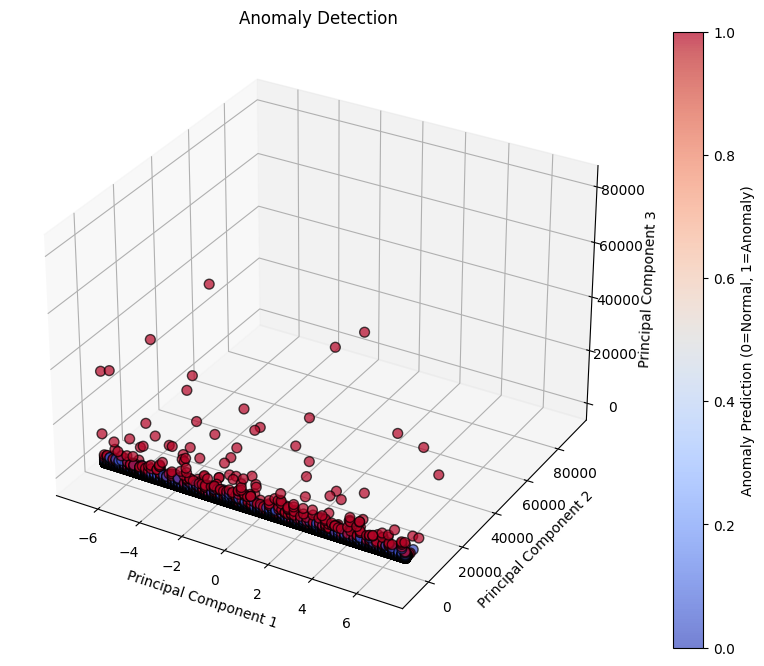

time: 4.43 s (started: 2024-11-03 06:13:11 +00:00)


In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# Assume 'X_combined_scaled' is your scaled feature matrix and 'y_pred' contains anomaly predictions

# Step 2: Apply Kernel PCA for 2D Visualization
kernel_pca = KernelPCA(n_components=3,kernel='linear')
X_pca = kernel_pca.fit_transform(combined_df_scaled)

# Step 5: Create a DataFrame for easy plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Predicted Anomaly'] = combined_df_scaled['Predicted Anomaly']  # Add predictions

# Step 6: Visualize Results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for anomalies and normal points
scatter = ax.scatter(
    pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'],
    c=pca_df['Predicted Anomaly'], cmap='coolwarm', edgecolor='k', s=50, alpha=0.7
)

# Add labels and colorbar
ax.set_title('Anomaly Detection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, ax=ax, label='Anomaly Prediction (0=Normal, 1=Anomaly)')
plt.show()

# Feature Selection

In [49]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Separate features and target
X = combined_df_scaled.drop(columns=['Predicted Anomaly'])
y = combined_df_scaled['Predicted Anomaly']

# Initialize XGBoost classifier with GPU support
xgb_clf = XGBClassifier( tree_method = "hist", device = "cuda", use_label_encoder=False, eval_metric='logloss')

# Set up RFECV with Stratified K-Fold cross-validation
rfecv = RFECV(
    estimator=xgb_clf,
    step=1,  # Number of features to remove at each iteration
    cv=StratifiedKFold(5),  # 5-fold stratified CV
    scoring='accuracy',  # Metric for evaluation, can adjust if necessary
    n_jobs=-1,  # Use all available cores
    verbose=0  # Silent RFECV output
)

# Fit RFECV to the data
rfecv.fit(X, y)

# Summary of selected features
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features:", list(X.columns[rfecv.support_]))


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [06:07:53] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [06:07:53] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boo

Optimal number of features: 17
Selected features: ['Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt', 'Avg_Sbmtd_Chrg', 'Tot_Bene_Day_Srvcs', 'Tot_Benes', 'Tot_Srvcs', 'Rndrng_Prvdr_Gndr', 'HCPCS_Drug_Ind', 'Place_Of_Srvc', 'Rndrng_Prvdr_Type_encoded', 'HCPCS_Cd_encoded', 'HCPCS_Degree_Centrality', 'HCPCS_Closeness_Centrality', 'HCPCS_PageRank', 'Provider Type_Closeness_Centrality', 'Provider Type_PageRank']
time: 43.8 s (started: 2024-11-03 06:07:49 +00:00)


# Modelling

In [46]:
# Assuming 'scaler' is the instance of MinMaxScaler used to scale combined_df_scaled
# And that numerical columns were scaled collectively (i.e., the scaler was fit on those columns together)

# Inverse transform only the numerical columns
combined_df_scaled[numerical_columns] = scaler.inverse_transform(combined_df_scaled[numerical_columns])


time: 7.66 ms (started: 2024-11-03 05:59:17 +00:00)


In [47]:
combined_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13531 entries, 0 to 13530
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Avg_Mdcr_Alowd_Amt                  13531 non-null  float64 
 1   Avg_Mdcr_Pymt_Amt                   13531 non-null  float64 
 2   Avg_Mdcr_Stdzd_Amt                  13531 non-null  float64 
 3   Avg_Sbmtd_Chrg                      13531 non-null  float64 
 4   Tot_Bene_Day_Srvcs                  13531 non-null  float64 
 5   Tot_Benes                           13531 non-null  float64 
 6   Tot_Srvcs                           13531 non-null  float64 
 7   Rndrng_NPI                          13531 non-null  category
 8   Rndrng_Prvdr_Gndr                   13531 non-null  int64   
 9   Rndrng_Prvdr_Mdcr_Prtcptg_Ind       13531 non-null  int64   
 10  HCPCS_Drug_Ind                      13531 non-null  int64   
 11  Place_Of_Srvc               

In [87]:
# Class Model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

class ModelEvaluator:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.models = {
            'Logistic Regression': LogisticRegression(max_iter=1000),
            'Random Forest': RandomForestClassifier(),
            'XGBoost': XGBClassifier(tree_method='hist', device='cuda', use_label_encoder=False, eval_metric='logloss',enable_categorical=True)
        }
        self.results = {}
        self.X_test = None
        self.y_test = None

    def train_models(self):
        # Split the data
        X_train, self.X_test, y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        
        for name, model in self.models.items():
            # Fit the model
            model.fit(X_train, y_train)
            # Make predictions
            y_pred = model.predict(self.X_test)
            # Store the classification report
            self.results[name] = classification_report(self.y_test, y_pred, output_dict=True)
            

    def get_results(self):
        # Print the classification reports
        for name, report in self.results.items():
            print(f"Classification Report for {name}:\n")
            print(classification_report(self.y_test, self.models[name].predict(self.X_test)))
            print("\n" + "="*50 + "\n")


# Example Usage
if __name__ == "__main__":
    # Assume 'combined_df_scaled' is your DataFrame and 'target' is your target variable
    # For example:
    
    y = combined_df_scaled['Predicted Anomaly']
    X = combined_df_scaled[['Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt',
       'Avg_Sbmtd_Chrg', 'Tot_Bene_Day_Srvcs', 'Tot_Benes', 'Tot_Srvcs',
        'Rndrng_Prvdr_Gndr', 
       'HCPCS_Drug_Ind', 'Place_Of_Srvc',  'HCPCS_Degree_Centrality',
       'HCPCS_Closeness_Centrality', 'HCPCS_PageRank', 
                                    'Provider Type_Closeness_Centrality',
       'Provider Type_PageRank' ]] #jika error, run downloaded_df di section bawah dulu


    evaluator = ModelEvaluator(X, y)
    evaluator.train_models()
    evaluator.get_results()
# ['Predicted Anomaly','Node','Rndrng_NPI','Rndrng_Prvdr_Type_encoded','HCPCS_Cd_encoded']

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2395
           1       0.90      0.52      0.66       312

    accuracy                           0.94      2707
   macro avg       0.92      0.76      0.81      2707
weighted avg       0.94      0.94      0.93      2707



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2395
           1       0.97      0.94      0.95       312

    accuracy                           0.99      2707
   macro avg       0.98      0.97      0.97      2707
weighted avg       0.99      0.99      0.99      2707



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2395
           1       0.95      0.95      0.95       312

    accuracy                           0.99      270

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13531 entries, 0 to 13530
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Avg_Mdcr_Alowd_Amt                  13531 non-null  float64
 1   Avg_Mdcr_Pymt_Amt                   13531 non-null  float64
 2   Avg_Mdcr_Stdzd_Amt                  13531 non-null  float64
 3   Avg_Sbmtd_Chrg                      13531 non-null  float64
 4   Tot_Bene_Day_Srvcs                  13531 non-null  float64
 5   Tot_Benes                           13531 non-null  float64
 6   Tot_Srvcs                           13531 non-null  float64
 7   Rndrng_Prvdr_Gndr                   13531 non-null  int64  
 8   HCPCS_Drug_Ind                      13531 non-null  int64  
 9   Place_Of_Srvc                       13531 non-null  int64  
 10  HCPCS_Degree_Centrality             13531 non-null  float64
 11  HCPCS_Closeness_Centrality          13531

In [90]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score

# Define StratifiedKFold with 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Initialize variables to store metrics
xgb_models = []  # To store each fold's trained model
recall_scores = []  # To store the recall score of each fold

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    # Split data for the current fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train XGBoost model on the current fold
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True, tree_method='hist')
    xgb_model.fit(X_train, y_train)
    
    # Predict and calculate recall score
    y_pred = xgb_model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)
    
    # Save the model
    xgb_models.append(xgb_model)
    
    print(f'Fold {fold} Recall: {recall:.4f}')

# Calculate the average recall across all folds
average_recall = np.mean(recall_scores)
print(f'\nAverage Recall Across All Folds: {average_recall:.4f}')

# Optionally, save the final model trained on all data
final_model = xgb.XGBClassifier(eval_metric='logloss', enable_categorical=True, tree_method='hist')
final_model.fit(X, y)
# # # Save the model to a file
# xgb_model.save_model('xgb_model graph.json')  # Save as JSON
# # or
# xgb_model.save_model('xgb_model graph.bin')  # Save as binary

Fold 1 Recall: 0.9315
Fold 2 Recall: 0.9563
Fold 3 Recall: 0.9344
Fold 4 Recall: 0.9500
Fold 5 Recall: 0.9313

Average Recall Across All Folds: 0.9407


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

time: 1.4 s (started: 2024-11-03 06:18:44 +00:00)


# SHAP Analysis

In [91]:
!pip install shap

time: 12 s (started: 2024-11-03 06:18:51 +00:00)


In [92]:
combined_df_scaled.columns

Index(['Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt',
       'Avg_Sbmtd_Chrg', 'Tot_Bene_Day_Srvcs', 'Tot_Benes', 'Tot_Srvcs',
       'Rndrng_NPI', 'Rndrng_Prvdr_Gndr', 'Rndrng_Prvdr_Mdcr_Prtcptg_Ind',
       'HCPCS_Drug_Ind', 'Place_Of_Srvc', 'Rndrng_Prvdr_Type_encoded',
       'HCPCS_Cd_encoded', 'Node', 'HCPCS_Degree_Centrality',
       'HCPCS_Closeness_Centrality', 'HCPCS_PageRank',
       'Provider Type_Degree_Centrality', 'Provider Type_Closeness_Centrality',
       'Provider Type_PageRank', 'Predicted Anomaly'],
      dtype='object')

time: 4.28 ms (started: 2024-11-03 06:19:03 +00:00)


In [93]:
X

,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Avg_Sbmtd_Chrg,Tot_Bene_Day_Srvcs,Tot_Benes,Tot_Srvcs,Rndrng_Prvdr_Gndr,HCPCS_Drug_Ind,Place_Of_Srvc,HCPCS_Degree_Centrality,HCPCS_Closeness_Centrality,HCPCS_PageRank,Provider Type_Closeness_Centrality,Provider Type_PageRank
0,2.970000,2.970000,2.940000,7.000000,27.0,25.0,27.0,1,0,0,0.000068,32.011005,0.000022,34.173637,0.000012
1,5.557271,4.401333,3.206894,15.000000,187.0,104.0,11220.0,0,0,0,0.000068,16.192122,0.000037,2.150329,0.000015
2,188.112258,150.412258,155.460000,412.000000,31.0,31.0,31.0,1,0,1,0.000068,11.854929,0.000031,2.130095,0.000070
3,28.466847,22.714447,27.862941,80.000000,288.0,16.0,425.0,0,0,0,0.000068,5.065860,0.000038,18.020838,0.000034
4,230.680000,184.245000,156.627500,1625.000000,12.0,12.0,12.0,1,0,1,0.000068,0.003968,0.000045,0.066196,0.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13526,82.909609,52.347522,63.220087,202.000000,230.0,159.0,230.0,0,0,0,0.000068,15.915889,0.000041,20.080823,0.000048
13527,68.292131,46.862787,46.661639,245.819672,61.0,61.0,61.0,1,0,1,0.000068,13.546953,0.000026,3.972919,0.000024
13528,10.036338,10.036338,10.290000,39.000000,71.0,67.0,71.0,0,0,0,0.000068,0.213396,0.000061,36.452187,0.000018
13529,6.555600,4.835200,5.024400,23.000000,12.0,11.0,25.0,1,0,0,0.000068,0.365654,0.000029,0.180052,0.000012


time: 27.3 ms (started: 2024-11-03 06:19:03 +00:00)


In [94]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

time: 1.69 ms (started: 2024-11-03 06:19:03 +00:00)


Variabel yang dipakai dalam pelatihan model

In [95]:
xgb_explainer = shap.Explainer(xgb_model, X_train, feature_perturbation='interventional')
xgb_shap_values = xgb_explainer(X_test,check_additivity=False)


time: 8.31 s (started: 2024-11-03 06:19:03 +00:00)


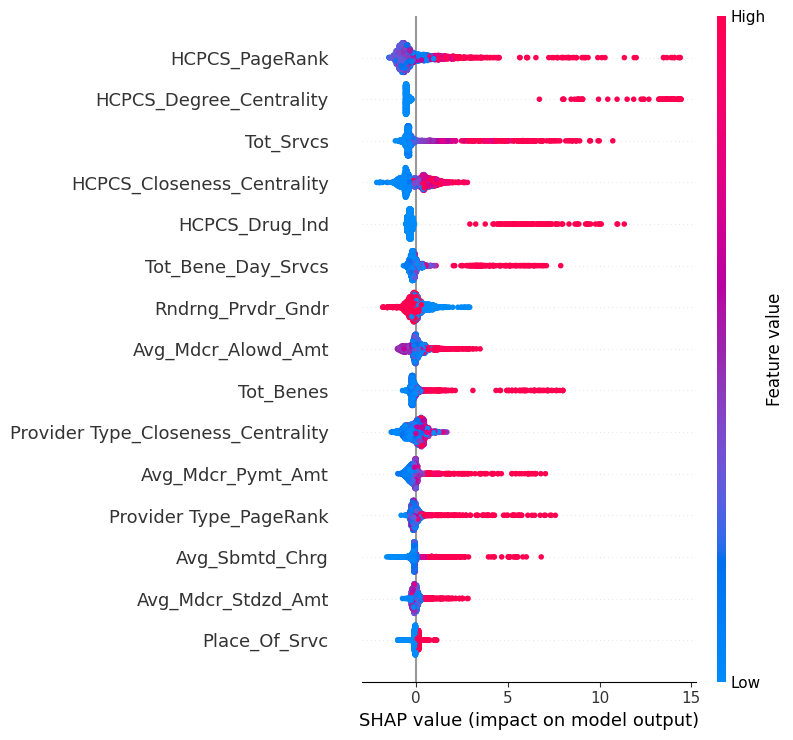

time: 1.4 s (started: 2024-11-03 06:19:11 +00:00)


In [96]:
# Summary plots
shap.summary_plot(xgb_shap_values, X_test, feature_names=X.columns)

In [97]:
# Initialize JavaScript visualization in Jupyter Notebook
shap.initjs()

# Set the width for the force plot
# Create a wider figure
plt.figure(figsize=(12, 9))  # Adjust the width and height as needed

# Create the force plot for the first instance
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values.values[0], X_test.iloc[0])


<Figure size 1200x900 with 0 Axes>

time: 28.7 ms (started: 2024-11-03 06:19:23 +00:00)


In [ ]:
# combined_df_scaled.to_csv('Final Dataset.csv',index=False)

# Download Dataset

cut 2 kolom karena ~0 variance:


* Provider Type_Degree_Centrality
* Rndrng_Prvdr_Mdcr_Prtcptg_Ind


In [98]:
downloaded_df = combined_df_scaled[['Rndrng_NPI','Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt',
       'Avg_Sbmtd_Chrg', 'Tot_Bene_Day_Srvcs', 'Tot_Benes', 'Tot_Srvcs',
        'Rndrng_Prvdr_Gndr', 
       'HCPCS_Drug_Ind', 'Place_Of_Srvc', 'Rndrng_Prvdr_Type_encoded',
       'HCPCS_Cd_encoded', 'Node', 'HCPCS_Degree_Centrality',
       'HCPCS_Closeness_Centrality', 'HCPCS_PageRank', 
                                    'Provider Type_Closeness_Centrality',
       'Provider Type_PageRank', 'Predicted Anomaly']]

time: 4.64 ms (started: 2024-11-03 06:19:31 +00:00)


In [101]:
downloaded_df

,Rndrng_NPI,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Avg_Sbmtd_Chrg,Tot_Bene_Day_Srvcs,Tot_Benes,Tot_Srvcs,Rndrng_Prvdr_Gndr,HCPCS_Drug_Ind,Place_Of_Srvc,Rndrng_Prvdr_Type_encoded,HCPCS_Cd_encoded,Node,HCPCS_Degree_Centrality,HCPCS_Closeness_Centrality,HCPCS_PageRank,Provider Type_Closeness_Centrality,Provider Type_PageRank,Predicted Anomaly
0,1124007489,2.970000,2.970000,2.940000,7.000000,27.0,25.0,27.0,1,0,0,44,266,1.124007e+09,0.000068,32.011005,0.000022,34.173637,0.000012,0
1,1356380828,5.557271,4.401333,3.206894,15.000000,187.0,104.0,11220.0,0,0,0,1,1005,1.356381e+09,0.000068,16.192122,0.000037,2.150329,0.000015,1
2,1497723472,188.112258,150.412258,155.460000,412.000000,31.0,31.0,31.0,1,0,1,27,1126,1.497723e+09,0.000068,11.854929,0.000031,2.130095,0.000070,0
3,1942677141,28.466847,22.714447,27.862941,80.000000,288.0,16.0,425.0,0,0,0,57,1094,1.942677e+09,0.000068,5.065860,0.000038,18.020838,0.000034,0
4,1245254515,230.680000,184.245000,156.627500,1625.000000,12.0,12.0,12.0,1,0,1,72,256,1.245255e+09,0.000068,0.003968,0.000045,0.066196,0.000060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13526,1063646651,82.909609,52.347522,63.220087,202.000000,230.0,159.0,230.0,0,0,0,18,1117,1.063647e+09,0.000068,15.915889,0.000041,20.080823,0.000048,0
13527,1861479370,68.292131,46.862787,46.661639,245.819672,61.0,61.0,61.0,1,0,1,6,950,1.861479e+09,0.000068,13.546953,0.000026,3.972919,0.000024,0
13528,1538127519,10.036338,10.036338,10.290000,39.000000,71.0,67.0,71.0,0,0,0,18,705,1.538128e+09,0.000068,0.213396,0.000061,36.452187,0.000018,0
13529,1497751085,6.555600,4.835200,5.024400,23.000000,12.0,11.0,25.0,1,0,0,38,141,1.497751e+09,0.000068,0.365654,0.000029,0.180052,0.000012,0


time: 30.4 ms (started: 2024-11-03 06:20:19 +00:00)


In [102]:
downloaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13531 entries, 0 to 13530
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Rndrng_NPI                          13531 non-null  category
 1   Avg_Mdcr_Alowd_Amt                  13531 non-null  float64 
 2   Avg_Mdcr_Pymt_Amt                   13531 non-null  float64 
 3   Avg_Mdcr_Stdzd_Amt                  13531 non-null  float64 
 4   Avg_Sbmtd_Chrg                      13531 non-null  float64 
 5   Tot_Bene_Day_Srvcs                  13531 non-null  float64 
 6   Tot_Benes                           13531 non-null  float64 
 7   Tot_Srvcs                           13531 non-null  float64 
 8   Rndrng_Prvdr_Gndr                   13531 non-null  int64   
 9   HCPCS_Drug_Ind                      13531 non-null  int64   
 10  Place_Of_Srvc                       13531 non-null  int64   
 11  Rndrng_Prvdr_Type_encoded   

In [103]:
downloaded_df.to_csv('Final Dataset with Graph 10000k row.csv',index=False)

time: 325 ms (started: 2024-11-03 06:20:35 +00:00)


# Test final dataset

skip aja kalo belum sampe production

In [104]:
import pandas as pd

# Read the Excel file
a = pd.read_excel('/kaggle/input/test-final/Final Dataset with Graph.xlsx')

# Display information about the DataFrame
a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rndrng_NPI                          22552 non-null  int64  
 1   Avg_Mdcr_Alowd_Amt                  22552 non-null  float64
 2   Avg_Mdcr_Pymt_Amt                   22552 non-null  float64
 3   Avg_Mdcr_Stdzd_Amt                  22552 non-null  float64
 4   Avg_Sbmtd_Chrg                      22552 non-null  float64
 5   Tot_Bene_Day_Srvcs                  22552 non-null  float64
 6   Tot_Benes                           22552 non-null  float64
 7   Tot_Srvcs                           22552 non-null  float64
 8   Rndrng_Prvdr_Gndr                   22552 non-null  int64  
 9   HCPCS_Drug_Ind                      22552 non-null  int64  
 10  Place_Of_Srvc                       22552 non-null  int64  
 11  Rndrng_Prvdr_Type_encoded           22552

In [ ]:
from xgboost import Booster

# Load model from file
model = Booster()
model.load_model("/kaggle/input/xgb-graph/other/default/1/xgb_model graph.bin")

In [105]:
from sklearn.model_selection import train_test_split

# Assuming 'a' is your original DataFrame
m = a.drop(columns=['Predicted Anomaly','Node','Rndrng_NPI','Rndrng_Prvdr_Type_encoded','HCPCS_Cd_encoded'])  # Features
n = a['Predicted Anomaly']  # Target variable

# Split the data into training and testing sets
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.2, random_state=42)


time: 7.57 ms (started: 2024-11-03 06:21:07 +00:00)


In [107]:
# from xgboost import DMatrix

# # Convert the test data to DMatrix format
# dtest = DMatrix(m_test)

# # Now make predictions
# pred = final_model.predict(dtest)

pred = final_model.predict(m_test)

time: 15.8 ms (started: 2024-11-03 06:21:28 +00:00)


In [110]:
print(classification_report(n_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3994
           1       0.82      0.56      0.66       517

    accuracy                           0.94      4511
   macro avg       0.88      0.77      0.81      4511
weighted avg       0.93      0.94      0.93      4511

time: 20.9 ms (started: 2024-11-03 06:21:57 +00:00)
